In [210]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier
import xgboost as xgb

In [211]:
df=pd.read_csv('Data/cleaned_df.csv',index_col=0)

In [212]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline Prediction

In [213]:
#GET BASE ACCURACY
base = max(df['target'].mean(), (1-df['target'].mean()))
base

0.5445544554455446

## Logistic Regression

In [214]:
from sklearn import metrics

#INSTANTIATE LOGISTIC REGRESSION
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
lr_acc_score=metrics.accuracy_score(y_test, y_pred_log)
lr_f1_score=metrics.f1_score(y_test, y_pred_log)
lr_conf_matrix = confusion_matrix(y_test, y_pred_log)
# checking accuracy
print('Test Accuracy score: ', lr_acc_score)
print('Test F1 score: ', lr_f1_score)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_log))

Test Accuracy score:  0.8852459016393442
Test F1 score:  0.8985507246376812
confusion matrix
[[23  4]
 [ 3 31]]


              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



## KNN

In [215]:
#INSTANTIATE KNN MODEL
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_knn = knn.predict(X_test)
knn_acc_score=metrics.accuracy_score(y_test, y_pred_knn)
knn_f1_score=metrics.f1_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
# checking accuracy
print('Test Accuracy score: ', knn_acc_score)
print('Test F1 score: ',knn_f1_score )
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_knn))

Test Accuracy score:  0.819672131147541
Test F1 score:  0.8405797101449276
confusion matrix
[[21  6]
 [ 5 29]]


              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



## Decision Tree Classifier

In [216]:
# INSATNTIATE DECISION TREE MODEL
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_acc_score=metrics.accuracy_score(y_test, y_pred_tree)
tree_f1_score=metrics.f1_score(y_test, y_pred_tree)
tree_conf_matrix=confusion_matrix(y_test,y_pred_tree)
# checking accuracy
print('Test Accuracy score: ', tree_acc_score)
print('Test F1 score: ', tree_f1_score)
print("confusion matrix")
print(tree_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_tree))

Test Accuracy score:  0.7704918032786885
Test F1 score:  0.7941176470588235
confusion matrix
[[20  7]
 [ 7 27]]


              precision    recall  f1-score   support

           0       0.74      0.74      0.74        27
           1       0.79      0.79      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



## Random Forest

In [217]:
#INSTANTIATE RANDOM FOREST MODEL
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_forest = rfc.predict(X_test)
rfc_acc_score=metrics.accuracy_score(y_test, y_pred_forest)
rfc_f1_score = metrics.f1_score(y_test, y_pred_forest)
rfc_conf_matrix=confusion_matrix(y_test,y_pred_forest)
# checking accuracy
print('Test Accuracy score: ', rfc_acc_score)
print('Test F1 score: ', rfc_f1_score)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_forest))

Test Accuracy score:  0.8360655737704918
Test F1 score:  0.8484848484848485
confusion matrix
[[23  4]
 [ 6 28]]


              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



## XGB

In [218]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(learning_rate=0.01, n_estimators=10, seed=25)
# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)
# Predict the labels of the test set: preds
y_pred_xgb = xg_cl.predict(X_test)
xgb_acc_score=metrics.accuracy_score(y_test, y_pred_xgb)
xgb_f1_score = metrics.f1_score(y_test, y_pred_xgb)
xgb_conf_matrix=confusion_matrix(y_test,y_pred_xgb)
# Compute the accuracy: accuracy
# checking accuracy
print('Test Accuracy score: ',xgb_acc_score)
print('Test F1 score: ', xgb_f1_score)
print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_xgb))

Test Accuracy score:  0.7540983606557377
Test F1 score:  0.782608695652174
confusion matrix
[[19  8]
 [ 7 27]]


              precision    recall  f1-score   support

           0       0.73      0.70      0.72        27
           1       0.77      0.79      0.78        34

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



## Naive Bayes

In [219]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test,y_pred_nb)
nb_acc_score = metrics.accuracy_score(y_test, y_pred_nb)
nb_f1_score=metrics.f1_score(y_test, y_pred_nb)
print('Test Accuracy score: ',nb_acc_score)
print('Test F1 score: ', nb_f1_score)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_nb))

Test Accuracy score:  0.8688524590163934
Test F1 score:  0.8888888888888888
confusion matrix
[[21  6]
 [ 2 32]]


              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



## Support Vector Classifier

In [220]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
svc_acc_score = metrics.accuracy_score(y_test, y_pred_svc)
svc_f1_score = metrics.f1_score(y_test, y_pred_svc)
print('Test Accuracy score: ',svc_acc_score)
print('Test F1 score: ', svc_f1_score)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score,'\n')
print(classification_report(y_test,y_pred_svc))

Test Accuracy score:  0.8688524590163934
Test F1 score:  0.8857142857142858
confusion matrix
[[22  5]
 [ 3 31]]


Accuracy of Support Vector Classifier: 0.8688524590163934 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



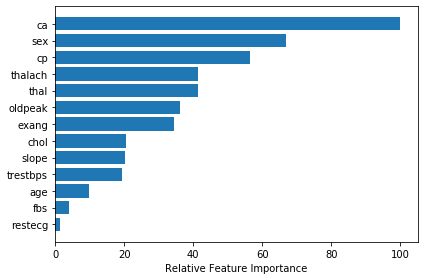

In [221]:
import numpy as np
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

## Plot ROC Curves

In [222]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_tree)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_forest)
fpr_xgb, tpr_xgb, thresholds_log = roc_curve(y_test, y_pred_xgb)
fpr_nb, tpr_nb, thresholds_log = roc_curve(y_test, y_pred_nb)
fpr_svc, tpr_svc, thresholds_log = roc_curve(y_test, y_pred_svc)



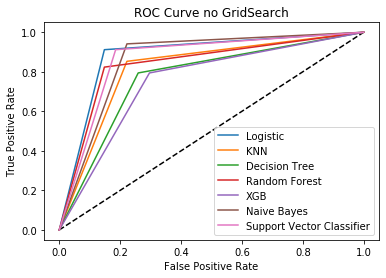

In [223]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log,label = 'Logistic')
plt.plot(fpr_knn, tpr_knn,label = 'KNN')
plt.plot(fpr_tree, tpr_tree,label = 'Decision Tree')
plt.plot(fpr_rfc, tpr_rfc,label = 'Random Forest')
plt.plot(fpr_xgb,tpr_xgb,label= 'XGB')
plt.plot(fpr_nb,tpr_nb,label= 'Naive Bayes')
plt.plot(fpr_svc,tpr_svc,label= 'Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve no GridSearch')
plt.show()

In [224]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute and print AUC score
print("AUC Logistic: {}".format(roc_auc_score(y_test, y_pred_log)))
print("AUC KNN: {}".format(roc_auc_score(y_test, y_pred_knn)))
print("AUC Decision Tree: {}".format(roc_auc_score(y_test, y_pred_tree)))
print("AUC Random Forest: {}".format(roc_auc_score(y_test, y_pred_forest)))
print("AUC XGB: {}".format(roc_auc_score(y_test, y_pred_xgb)))
print("AUC Naive Bayes: {}".format(roc_auc_score(y_test, y_pred_nb)))
print("AUC Support Vector Classifier: {}".format(roc_auc_score(y_test, y_pred_svc)))



AUC Logistic: 0.8818082788671023
AUC KNN: 0.815359477124183
AUC Decision Tree: 0.767429193899782
AUC Random Forest: 0.8376906318082789
AUC XGB: 0.7489106753812637
AUC Naive Bayes: 0.8594771241830065
AUC Support Vector Classifier: 0.8632897603485838


# Model Evaluation

In [226]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Naive Bayes', 'Support Vector Classifier'], 'F1': [lr_f1_score,
                    rfc_f1_score,xgb_f1_score,knn_f1_score,tree_f1_score,nb_f1_score, svc_f1_score]})
model_ev

,Model,F1
0,Logistic Regression,0.898551
1,Random Forest,0.848485
2,Extreme Gradient Boost,0.782609
3,K-Nearest Neighbour,0.840580
4,Decision Tree,0.794118
5,Naive Bayes,0.888889
6,Support Vector Classifier,0.885714


# Ensembling

In [230]:
scv=StackingCVClassifier(classifiers=[logreg,nb,svc],meta_classifier=nb,random_state=22)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
scv_f1_score = f1_score(y_test, scv_predicted)

print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_f1_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confusion matrix
[[24  3]
 [ 2 32]]


Accuracy of StackingCVClassifier: 92.75362318840578 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



# Grid Search CV

## LR Grid

In [231]:
from sklearn.model_selection import GridSearchCV

#SET PARAMATER GRID
param_grid_log =  {'penalty' : ['l1', 'l2'],
                   'C' : np.logspace(-4, 4, 20)}
grid_search_log = GridSearchCV(estimator = logreg, param_grid = param_grid_log,cv = 7,scoring = 'accuracy', n_jobs = -1)

In [232]:
grid_search_log.fit(X_train,y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'C': 0.615848211066026, 'penalty': 'l2'}


In [357]:
logreg_grid = LogisticRegression(**log_params)

logreg_grid.fit(X_train, y_train)

y_pred_log_grid = logreg_grid.predict(X_test)

lr_f1_score2=metrics.f1_score(y_test, y_pred_log_grid)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_log_grid))

# checking F1
print('Test F1 score: ', lr_f1_score2)

Test Accuracy score:  0.8852459016393442
Test F1 score:  0.8985507246376812


## XGB Grid

In [370]:
xg_cl.get_params().keys()

dict_keys(['base_score', 'colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'nthread', 'objective', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample'])

In [396]:
#SET PARAMATER GRID
param_grid_xgb =  {'max_depth':[3,4,5],
                  'learning_rate':[0.1,0.01,0.001],
                  'n_estimators':[9,10,11,12],
                   'seed':[10,20,25]
                  
                  }
grid_search_xgb = GridSearchCV(estimator = xg_cl, param_grid = param_grid_xgb,cv = 7,scoring = 'f1', n_jobs = -1)

In [397]:
grid_search_xgb.fit(X_train,y_train)
xgb_params = grid_search_xgb.best_params_
print(xgb_params)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 11, 'seed': 10}


In [398]:
xgb_grid = xgb.XGBClassifier(**xgb_params)
xgb_grid.fit(X_train,y_train)
y_pred_xgb_grid = xgb_grid.predict(X_test)
xgb_f1_score2=metrics.f1_score(y_test, y_pred_xgb_grid)
# checking accuracy
print('Test F1 score: ', xgb_f1_score2)

Test F1 score:  0.8405797101449276


## NB Grid

In [234]:
nb.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [235]:
#SET PARAMATER GRID
param_grid_nb =  {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search_nb = GridSearchCV(estimator = nb, param_grid = param_grid_nb,cv = 7,scoring = 'accuracy', n_jobs = -1)

In [236]:
grid_search_nb.fit(X_train,y_train)
nb_params = grid_search_nb.best_params_
print(nb_params)

{'var_smoothing': 0.8111308307896871}


In [360]:
nb_grid = GaussianNB(**nb_params)
nb_grid.fit(X_train,y_train)
y_pred_nb_grid = nb_grid.predict(X_test)
nb_f1_score2=metrics.f1_score(y_test, y_pred_nb_grid)
# checking accuracy
print('Test F1 score: ', nb_f1_score2)

Test F1 score:  0.8533333333333334


## SVC Grid

In [238]:
svc.get_params().keys()
#kernel='rbf', C=2

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [239]:
#SET PARAMATER GRID
param_grid_svc =  {'kernel':['linear', 'rbf', 'poly'],
                   'C' :[0.1, 1, 10, 100, 1000],
                   'class_weight':['balanced', None]
                  }
grid_search_svc = GridSearchCV(estimator = svc, param_grid = param_grid_svc,cv = 7,scoring = 'accuracy', n_jobs = -1)

In [240]:
grid_search_svc.fit(X_train,y_train)
svc_params = grid_search_svc.best_params_
print(svc_params)

{'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}


In [361]:
svc_grid = SVC(**svc_params, probability=True)
svc_grid.fit(X_train,y_train)
y_pred_svc_grid = svc_grid.predict(X_test)
svc_f1_score2=metrics.f1_score(y_test, y_pred_svc_grid)

svc_conf_matrix = confusion_matrix(y_test, y_pred_svc_grid)
svc_acc_score_grid = metrics.accuracy_score(y_test, y_pred_svc_grid)
print('Test Accuracy score: ',svc_f1_score2)

Test Accuracy score:  0.8985507246376812


# KNN Grid

In [242]:
#SET PARAMATER GRID
param_grid_knn = {'n_neighbors' : [15,17,19],
                 'weights':['uniform','distance'],
                 'metric' : ['euclidean','manhattan']}
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn,cv = 5, scoring = 'f1',n_jobs = -1)


In [243]:
grid_search_knn.fit(X_train,y_train)
knn_params = grid_search_knn.best_params_
print(knn_params)

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}


In [362]:
knn_grid = KNeighborsClassifier(**knn_params)
knn_grid.fit(X_train,y_train)
y_pred_knn_grid = knn_grid.predict(X_test)
knn_f1_score2=metrics.f1_score(y_test, y_pred_knn_grid)
# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_knn_grid))

# checking F1
print('Test F1 score: ', knn_f1_score2)

Test Accuracy score:  0.8524590163934426
Test F1 score:  0.8767123287671232


# Decision tree grid

In [334]:
#SET PARAMATER GRID
param_grid_tree = { 'criterion' : ['gini', 'entropy'],
                   'max_depth' : [2,3,4,5,6,7,8,9],
                  'min_samples_leaf':[6,7,8], 
                   'max_leaf_nodes' : [15,16,17,18],
                   'max_features': ['auto','sqrt','log2'],
                   'random_state': [42,52,62]
                  }
grid_search_tree = GridSearchCV(estimator = tree, param_grid = param_grid_tree,cv = 7,scoring = 'f1', n_jobs = -1)

In [335]:
grid_search_tree.fit(X_train,y_train)
tree_params = grid_search_tree.best_params_
print(tree_params)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 15, 'min_samples_leaf': 7, 'random_state': 52}


In [363]:
tree_grid = DecisionTreeClassifier(**tree_params)
tree_grid.fit(X_train, y_train)
y_pred_tree_grid = tree_grid.predict(X_test)
tree_f1_score2=metrics.f1_score(y_test, y_pred_tree_grid)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_tree_grid))

# checking F1
print('Test F1 score: ', tree_f1_score2)

Test Accuracy score:  0.8032786885245902
Test F1 score:  0.8125


# Random forest grid

In [251]:
#SET PARAMATER GRID
param_grid_forest = { 
    'n_estimators': [90,100,110],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [ 15,16,18, 19, 21, 23],
    'max_depth': [7, 8, 9, 10, 12],
    'max_features': ['auto', 'log2']
    
}

grid_search_forest = GridSearchCV(estimator = rfc, param_grid = param_grid_forest,cv = 5,scoring = 'accuracy')

In [252]:

grid_search_forest.fit(X_train,y_train)
forest_params = grid_search_forest.best_params_
print(forest_params)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 19, 'n_estimators': 100}


In [365]:
forest_grid = RandomForestClassifier(**forest_params)
forest_grid.fit(X_train, y_train)
y_pred_forest_grid = forest_grid.predict(X_test)
rfc_f1_score2=metrics.f1_score(y_test, y_pred_forest_grid)
# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_forest_grid))

# checking F1
print('Test F1 score: ',rfc_f1_score2)

Test Accuracy score:  0.8360655737704918
Test F1 score:  0.8571428571428571


# Plot ROC Curves

In [425]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr_log_grid, tpr_log_grid, thresholds_log = roc_curve(y_test, y_pred_log_grid)
fpr_knn_grid, tpr_knn_grid, thresholds_knn = roc_curve(y_test, y_pred_knn_grid)
fpr_tree_grid, tpr_tree_grid, thresholds_tree = roc_curve(y_test, y_pred_tree_grid)
fpr_rfc_grid, tpr_rfc_grid, thresholds_rfc = roc_curve(y_test, y_pred_forest_grid)
fpr_xgb_grid, tpr_xgb_grid, thresholds_log = roc_curve(y_test, y_pred_xgb_grid)
fpr_nb_grid, tpr_nb_grid, thresholds_log = roc_curve(y_test, y_pred_nb_grid)
fpr_svc_grid, tpr_svc_grid, thresholds_log = roc_curve(y_test, y_pred_svc_grid)


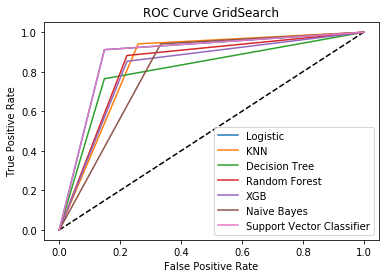

In [428]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log_grid, tpr_log_grid,label = 'Logistic')
plt.plot(fpr_knn_grid, tpr_knn_grid,label = 'KNN')
plt.plot(fpr_tree_grid, tpr_tree_grid,label = 'Decision Tree')
plt.plot(fpr_rfc_grid, tpr_rfc_grid,label = 'Random Forest')
plt.plot(fpr_xgb_grid,tpr_xgb_grid,label= 'XGB')
plt.plot(fpr_nb_grid,tpr_nb_grid,label= 'Naive Bayes')
plt.plot(fpr_svc_grid,tpr_svc_grid,label= 'Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve GridSearch')
plt.show()

In [429]:
# Compute and print AUC score
print("AUC Logistic: {}".format(roc_auc_score(y_test, y_pred_log_grid)))
print("AUC KNN: {}".format(roc_auc_score(y_test, y_pred_knn_grid)))
print("AUC Decision Tree: {}".format(roc_auc_score(y_test, y_pred_tree_grid)))
print("AUC Random Forest: {}".format(roc_auc_score(y_test, y_pred_forest_grid)))
print("AUC XGB: {}".format(roc_auc_score(y_test, y_pred_xgb_grid)))
print("AUC Naive Bayes: {}".format(roc_auc_score(y_test, y_pred_nb_grid)))
print("AUC Support Vector Classifier: {}".format(roc_auc_score(y_test, y_pred_svc_grid)))

AUC Logistic: 0.8818082788671023
AUC KNN: 0.840958605664488
AUC Decision Tree: 0.8082788671023965
AUC Random Forest: 0.8300653594771241
AUC XGB: 0.815359477124183
AUC Naive Bayes: 0.803921568627451
AUC Support Vector Classifier: 0.8818082788671023


# Grid Search Model Evaluation

In [418]:
model_ev2 = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Naive Bayes', 'Support Vector Classifier'], 'F1': [lr_f1_score2,
                    rfc_f1_score2,xgb_f1_score2,knn_f1_score2,tree_f1_score2,nb_f1_score2, svc_f1_score2]})
model_ev2

,Model,F1
0,Logistic Regression,0.898551
1,Random Forest,0.857143
2,Extreme Gradient Boost,0.840580
3,K-Nearest Neighbour,0.876712
4,Decision Tree,0.812500
5,Naive Bayes,0.853333
6,Support Vector Classifier,0.898551


In [433]:
scv=StackingCVClassifier(classifiers=[logreg_grid,knn_grid,svc_grid],meta_classifier=nb,random_state=22)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
scv_f1_score = f1_score(y_test, scv_predicted)

print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_f1_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confusion matrix
[[24  3]
 [ 3 31]]


Accuracy of StackingCVClassifier: 91.17647058823528 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [434]:
cm = confusion_matrix(y_test, scv_predicted)
classes = ['No Disease', 'Disease']

In [435]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[24  3]
 [ 3 31]]


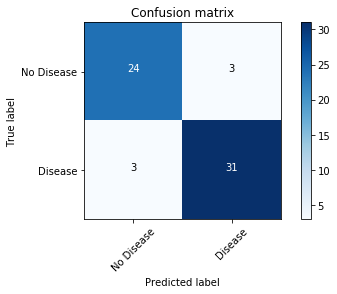

In [436]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [437]:
abs(base-metrics.accuracy_score(y_test, scv_predicted))/base


0.6557377049180326